In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from urllib.request import urlopen 
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sn
import pandas as pd
import math


In [3]:
cd downloads

/Users/apple/Downloads


In [4]:
cd downloads


[Errno 2] No such file or directory: 'downloads'
/Users/apple/Downloads


# Loading the datasets

In [5]:
can = pd.read_csv('data.csv',delimiter=',')

In [6]:
can.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

        ...       texture_worst  perimeter_worst  area_worst  \
564     ...               26.40           166.10      2027.0   
565     ...               38.25           155.00      1731.0   
566     ...               34.12           126.70      1124.0   
567     ...               39.42           184.60      1821.0   
568     ...               30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  
564          NaN  
565          NaN  
566          NaN  
567          NaN  
568          NaN  

[5 rows x 33 columns]

# Exploratory Data Analysis

In [305]:
can[34:40]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
34  854039         M        16.13         17.88          107.00      807.2   
35  854253         M        16.74         21.59          110.10      869.5   
36  854268         M        14.25         21.72           93.63      633.0   
37  854941         B        13.03         18.42           82.61      523.8   
38  855133         M        14.99         25.20           95.54      698.8   
39  855138         M        13.48         20.82           88.40      559.2   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
34          0.10400           0.15590         0.13540              0.07752   
35          0.09610           0.13360         0.13480              0.06018   
36          0.09823           0.10980         0.13190              0.05598   
37          0.08983           0.03766         0.02562              0.02923   
38          0.09387           0.05131         0.02398              0.02899   
39          0.10160           0.12550         0.10630              0.05439   

       ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
34     ...               27.26           132.70      1261.0           0.14460   
35     ...               29.02           133.50      1229.0           0.15630   
36     ...               30.36           116.20       799.6           0.14460   
37     ...               22.81            84.46       545.9           0.09701   
38     ...               25.20            95.54       698.8           0.09387   
39     ...               26.02           107.30       740.4           0.16100   

    compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
34            0.58040          0.52740               0.18640          0.4270   
35            0.38350          0.54090               0.18130          0.4863   
36            0.42380          0.51860               0.14470          0.3591   
37            0.04619          0.04833               0.05013          0.1987   
38            0.05131          0.02398               0.02899          0.1565   
39            0.42250          0.50300               0.22580          0.2807   

    fractal_dimension_worst  Unnamed: 32  
34                  0.12330          NaN  
35                  0.08633          NaN  
36                  0.10140          NaN  
37                  0.06169          NaN  
38                  0.05504          NaN  
39                  0.10710          NaN  

[6 rows x 33 columns]

# Understand Underlying Data Structure

In [306]:
can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [307]:
can.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean     ...       texture_worst  perimeter_worst  \
count     569.000000     ...          569.000000       569.000000   
mean        0.181162     ...           25.677223       107.261213   
std         0.027414     ...            6.146258        33.602542   
min         0.106000     ...           12.020000        50.410000   
25%         0.161900     ...           21.080000        84.110000   
50%         0.179200     ...           25.410000        97.660000   
75%         0.195700     ...           29.720000       125.400000   
max         0.304000     ...           49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [308]:
can.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [309]:
can.diagnosis.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

In [310]:
can.isnull().any().sum()

1

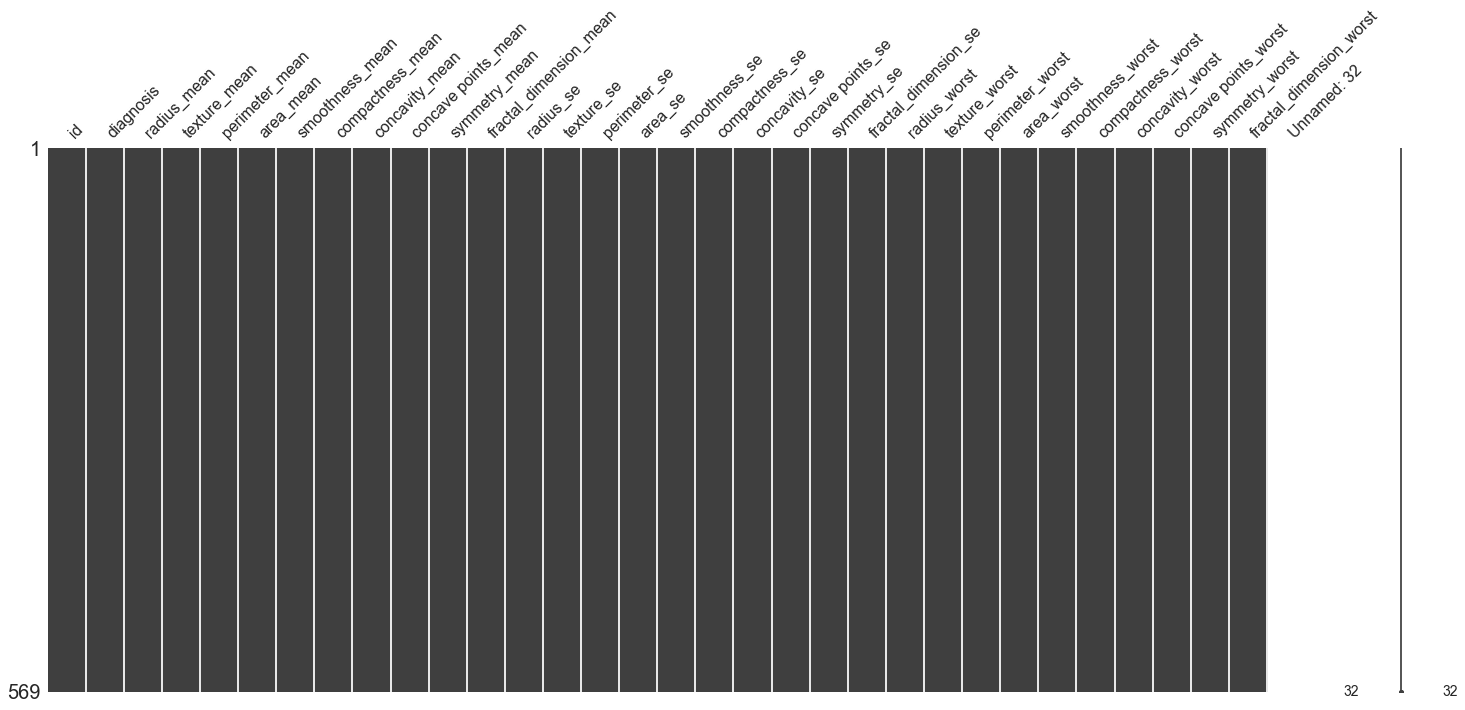

In [311]:
import missingno as msno
msno.matrix(can)

In [312]:
can.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [313]:
can.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean           ...             radius_worst  texture_worst  \
564         0.1726           ...                   25.450          26.40   
565         0.1752           ...                   23.690          38.25   
566         0.1590           ...                   18.980          34.12   
567         0.2397           ...                   25.740          39.42   
568         0.1587           ...                    9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[5 rows x 31 columns]

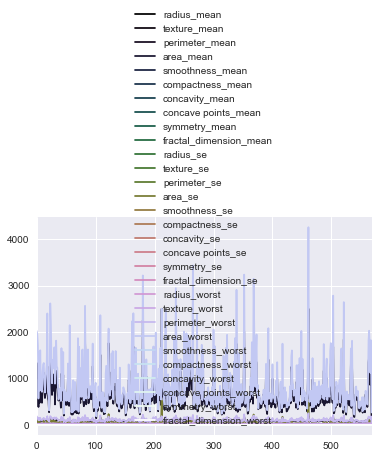

In [314]:
from pandas.tools.plotting import andrews_curves #visu

plt.figure()
can.plot(colormap='cubehelix')
#andrews_curves(can, "diagnosis")

# Assigning values for cata

In [315]:
can['diagnosis']=can['diagnosis'].map({'M':1,'B':0})

In [316]:
can.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean           ...             radius_worst  texture_worst  \
564         0.1726           ...                   25.450          26.40   
565         0.1752           ...                   23.690          38.25   
566         0.1590           ...                   18.980          34.12   
567         0.2397           ...                   25.740          39.42   
568         0.1587           ...                    9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[5 rows x 31 columns]

In [330]:
can.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

# checking for imbalance 

In [318]:
can.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [319]:
can_df = pd.DataFrame(can.diagnosis.value_counts())

In [320]:
can_df

diagnosis
0        357
1        212

In [321]:
can_df['Count'] = can_df.index
can_df

diagnosis  Count
0        357      0
1        212      1

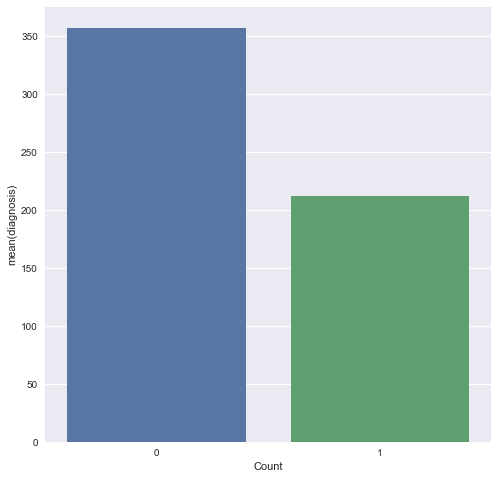

In [322]:
import seaborn as sn
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (8, 8)})
sn.barplot(x = 'Count', y = 'diagnosis', data = can_df  )
#sns.countplot(can['diagnosis'],label='Count',palette="Set3")

In [323]:
can.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [324]:
vars1=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# heatmaps

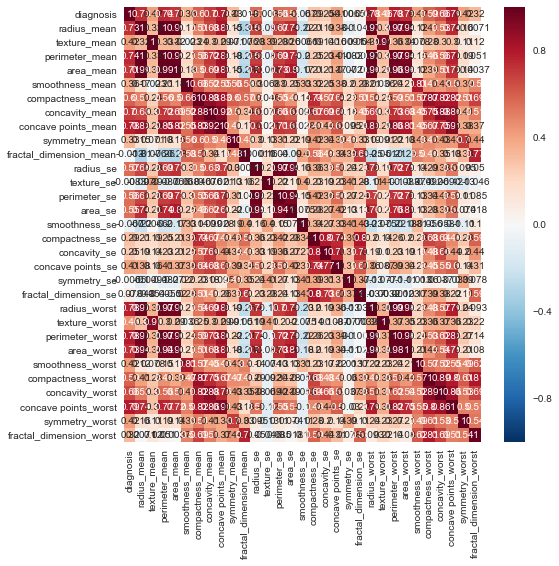

In [325]:
sn.heatmap( can[vars1].corr(), annot=True )

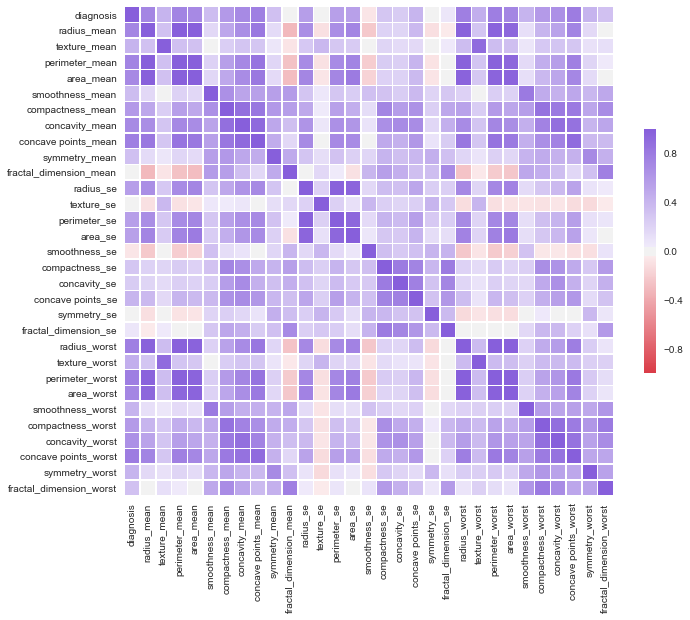

In [326]:
corr = can.corr(method = 'pearson') # Correlation Matrix
f, ax = plt.subplots(figsize=(11, 9))
#custom diverging colormap 
cmap = sns.diverging_palette(10, 275, as_cmap=True)
#heatmap correct aspect ratio 
sns.heatmap(corr, cmap=cmap,square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

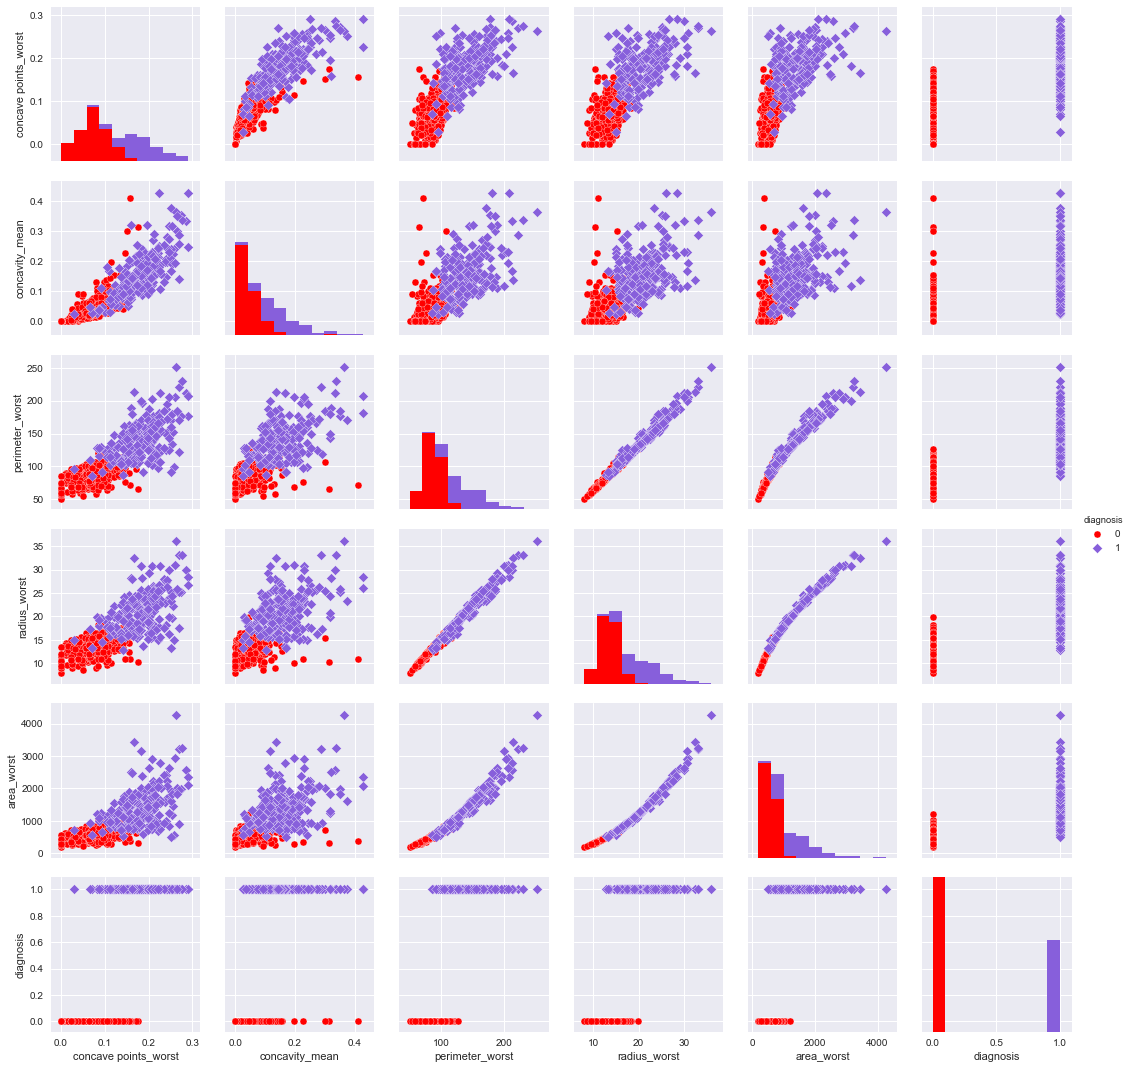

In [329]:
cols = ['concave points_worst', 'concavity_mean', 
        'perimeter_worst', 'radius_worst', 
        'area_worst', 'diagnosis']

sns.pairplot(can,
             x_vars = cols,
             y_vars = cols,
             hue = 'diagnosis', 
             palette = ('Red', '#875FDB'), 
             markers=["o", "D"])

# Box plot

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


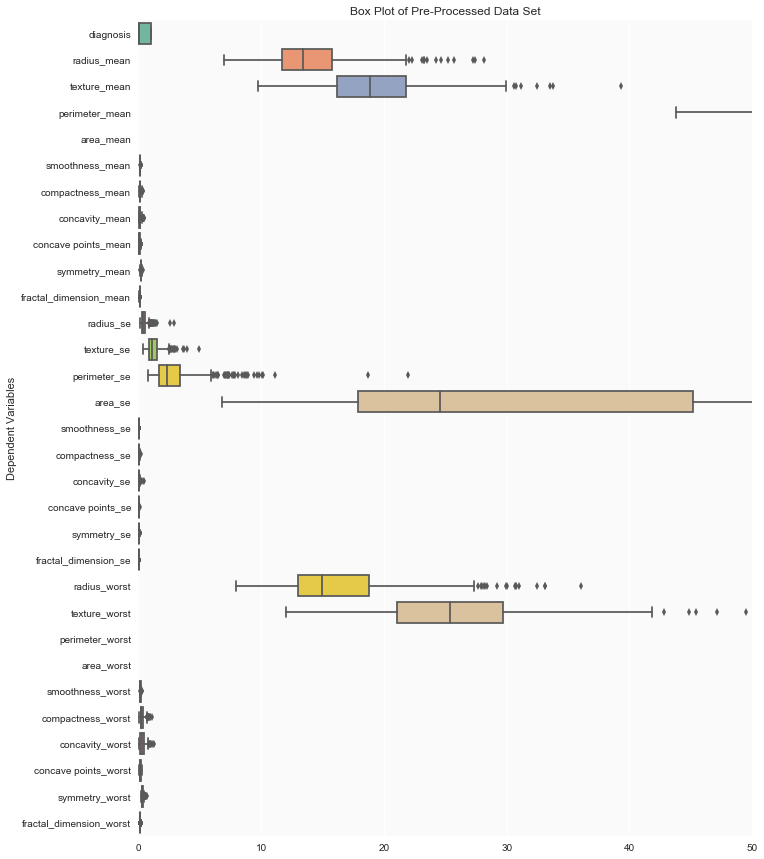

In [182]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 50))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = can, 
  orient = 'h', 
  palette = 'Set2')

# Normalization of data 

In [183]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(can)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.tail()

0         1         2         3         4         5         6   \
564  1.0  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055   
565  1.0  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714   
566  1.0  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340   
567  1.0  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197   
568  0.0  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351   

           7         8         9     ...           21        22        23  \
564  0.571462  0.690358  0.336364    ...     0.623266  0.383262  0.576174   
565  0.337395  0.486630  0.349495    ...     0.560655  0.699094  0.520892   
566  0.216753  0.263519  0.267677    ...     0.393099  0.589019  0.379949   
567  0.823336  0.755467  0.675253    ...     0.633582  0.730277  0.668310   
568  0.000000  0.000000  0.266162    ...     0.054287  0.489072  0.043578   

           24        25        26        27        28        29        30  
564  0.452664  0.461137  0.178527  0.328035  0.761512  0.097575  0.105667  
565  0.379915  0.300007  0.159997  0.256789  0.559450  0.198502  0.074315  
566  0.230731  0.282177  0.273705  0.271805  0.487285  0.128721  0.151909  
567  0.402035  0.619626  0.815758  0.749760  0.910653  0.497142  0.452315  
568  0.020497  0.124084  0.036043  0.000000  0.000000  0.257441  0.100682  

[5 rows x 31 columns]

In [184]:
df_normalized.describe()

0           1           2           3           4           5   \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.372583    0.338222    0.323965    0.332935    0.216920    0.394785   
std      0.483918    0.166787    0.145453    0.167915    0.149274    0.126967   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.223342    0.218465    0.216847    0.117413    0.304595   
50%      0.000000    0.302381    0.308759    0.293345    0.172895    0.390358   
75%      1.000000    0.416442    0.408860    0.416765    0.271135    0.475490   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9      ...              21  \
count  569.000000  569.000000  569.000000  569.000000     ...      569.000000   
mean     0.260601    0.208058    0.243137    0.379605     ...        0.296663   
std      0.161992    0.186785    0.192857    0.138456     ...        0.171940   
min      0.000000    0.000000    0.000000    0.000000     ...        0.000000   
25%      0.139685    0.069260    0.100944    0.282323     ...        0.180719   
50%      0.224679    0.144189    0.166501    0.369697     ...        0.250445   
75%      0.340531    0.306232    0.367793    0.453030     ...        0.386339   
max      1.000000    1.000000    1.000000    1.000000     ...        1.000000   

               22          23          24          25          26          27  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.363998    0.283138    0.170906    0.404138    0.220212    0.217403   
std      0.163813    0.167352    0.139932    0.150779    0.152649    0.166633   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.241471    0.167837    0.081130    0.300007    0.116337    0.091454   
50%      0.356876    0.235320    0.123206    0.397081    0.179110    0.181070   
75%      0.471748    0.373475    0.220901    0.494156    0.302520    0.305831   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               28          29          30  
count  569.000000  569.000000  569.000000  
mean     0.393836    0.263307    0.189596  
std      0.225884    0.121954    0.118466  
min      0.000000    0.000000    0.000000  
25%      0.223127    0.185098    0.107700  
50%      0.343402    0.247782    0.163977  
75%      0.554639    0.318155    0.242949  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


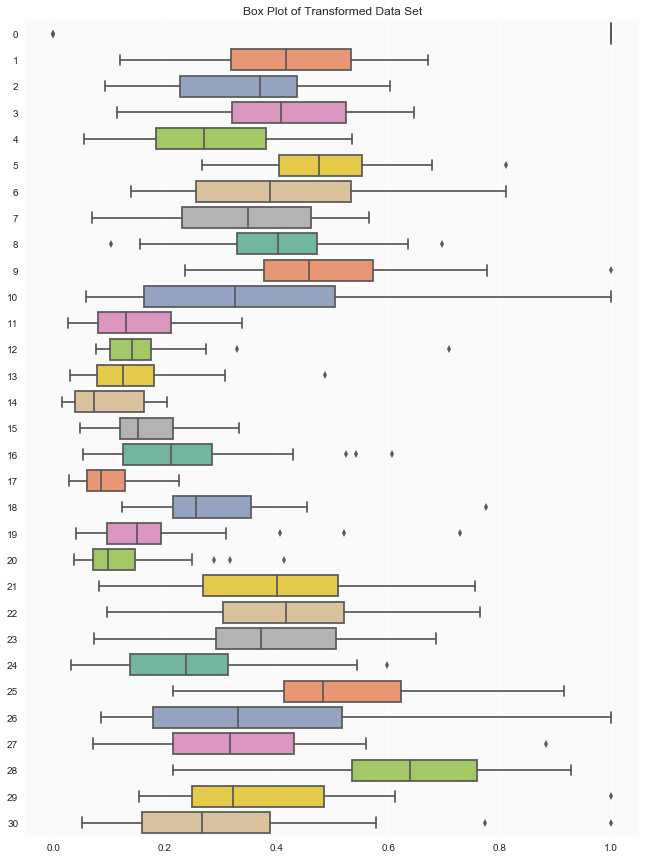

In [185]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
plt.title("Box Plot of Transformed Data Set")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = df_normalized[1:30], 
  orient = 'h', 
  palette = 'Set2')

In [186]:
features_mean= list(can.columns[1:11])
features_se= list(can.columns[11:20])
features_worst=list(can.columns[21:31])
print(features_mean)
print(features_se)
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Histogram 

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


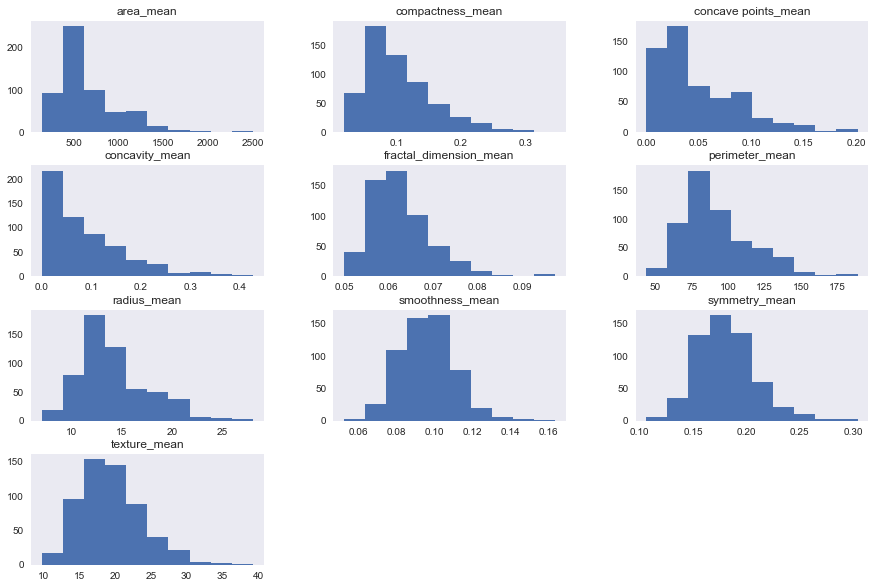

In [187]:
data_mean=can.ix[:,1:11]
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

In [188]:
data_se = can.ix[:,11:22]
#hist_mean= data_se.hist(bins=10, figsize=(15, 10),grid=False,)

In [189]:
data_worst=can.ix[:,23:]
#hist_mean= data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

# Multimodal Correlation matrix

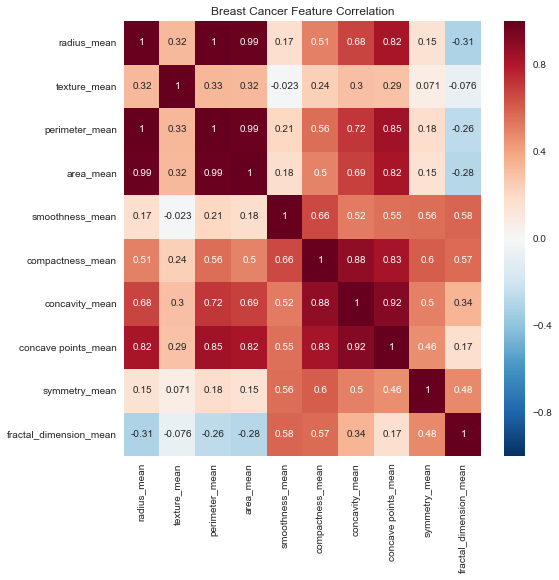

In [190]:
plt.title('Breast Cancer Feature Correlation')
sn.heatmap(can[features_mean].corr(), annot=True )

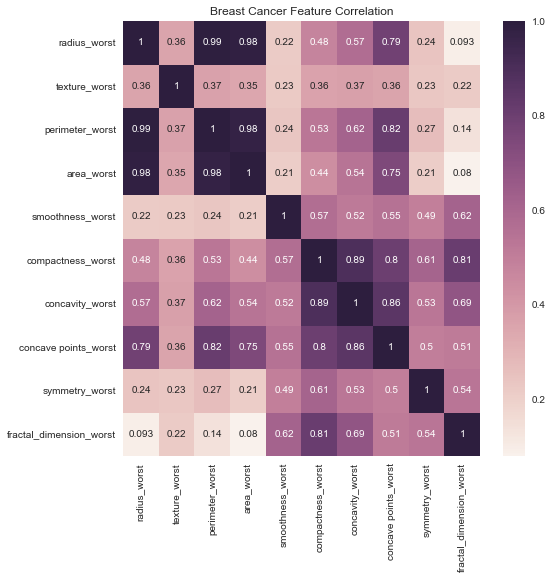

In [191]:
plt.title('Breast Cancer Feature Correlation')
sn.heatmap(can[features_worst].corr(), annot=True )

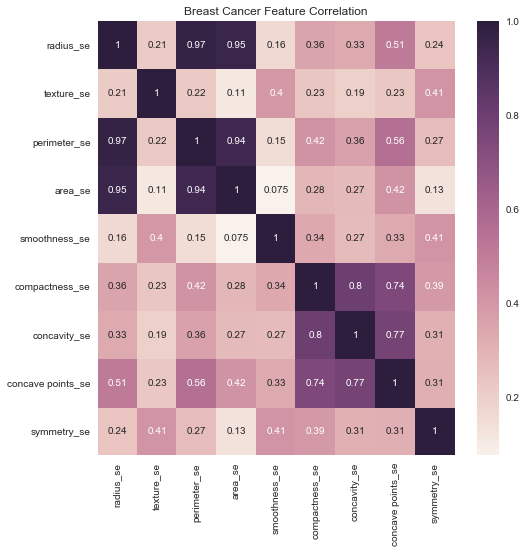

In [192]:
plt.title('Breast Cancer Feature Correlation')
sn.heatmap(can[features_se].corr(), annot=True )

# Scatterplot Matrix

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


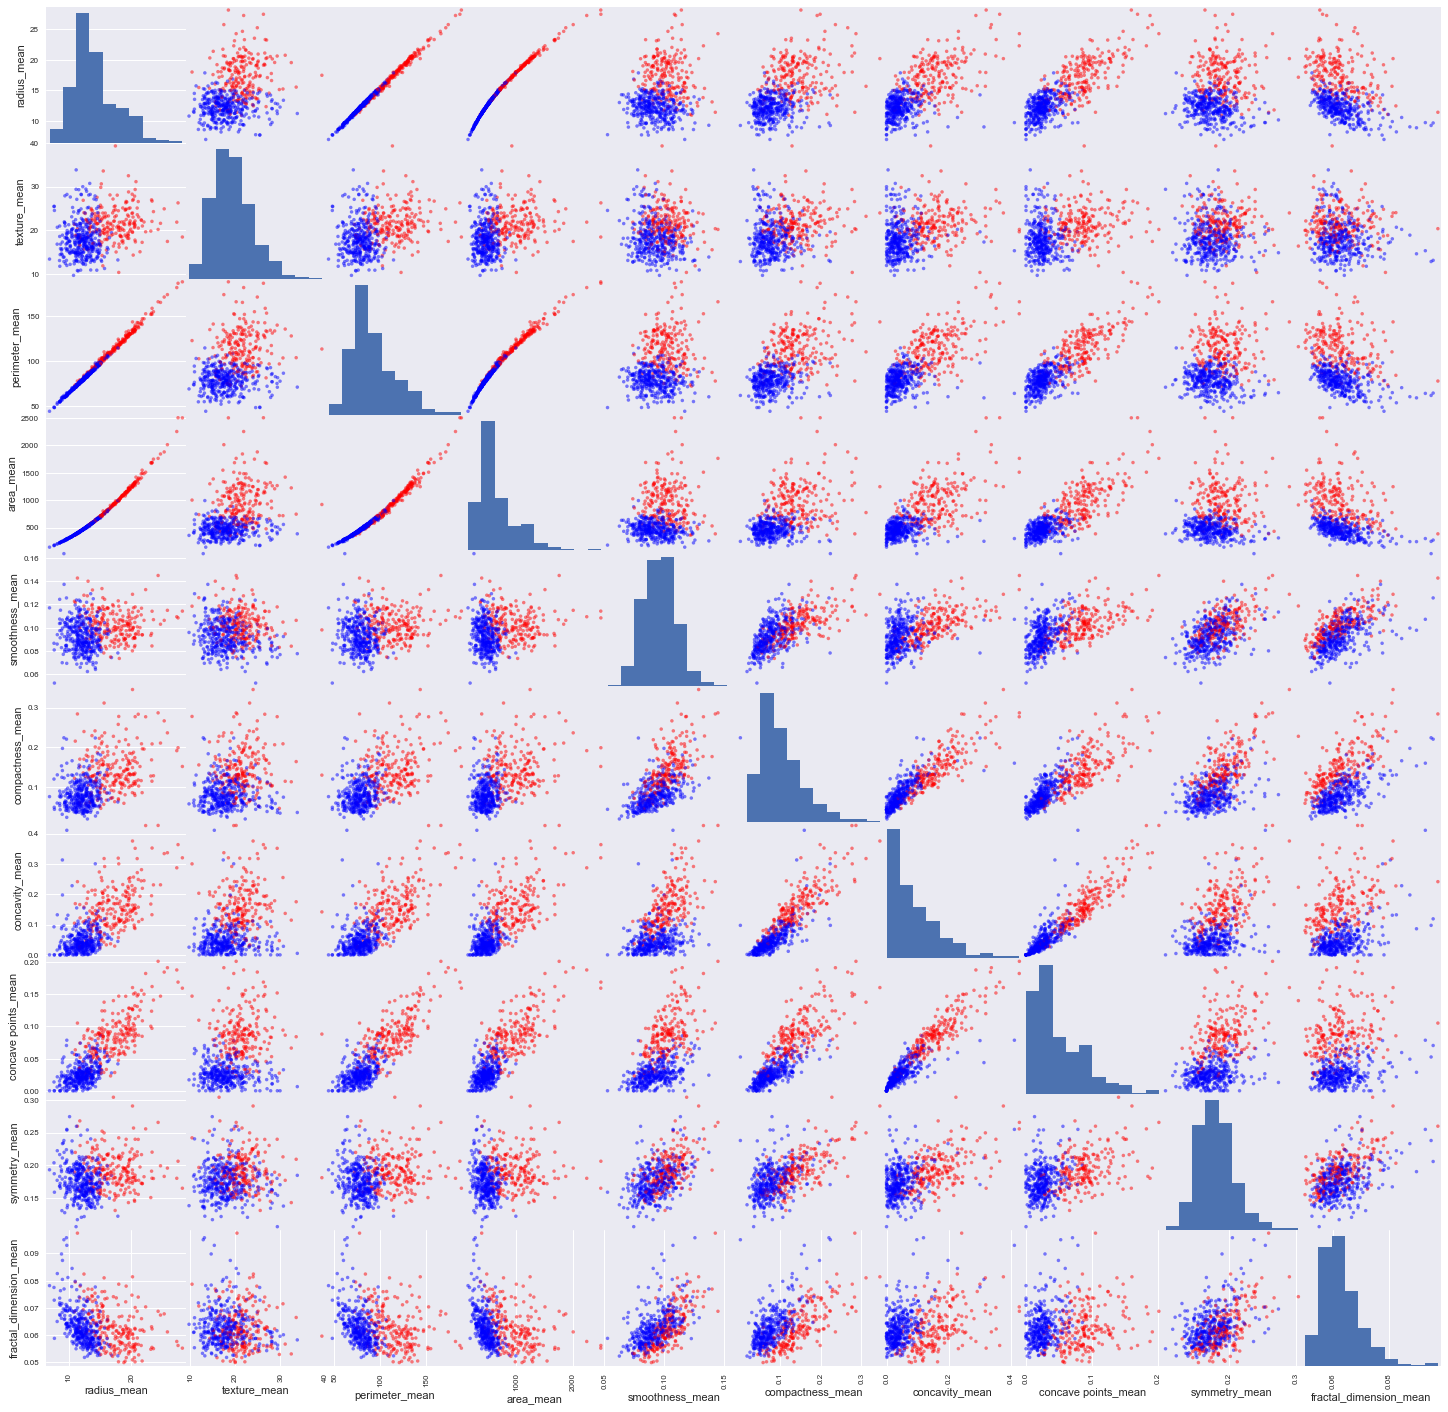

In [193]:
color_function = {0: "blue", 1: "red"} 
colors = can["diagnosis"].map(lambda x: color_function.get(x))# 
pd.scatter_matrix(can[features_mean], c=colors, alpha = 0.5, figsize = (25, 25)); 

KeyError: 'concave_points_worst'

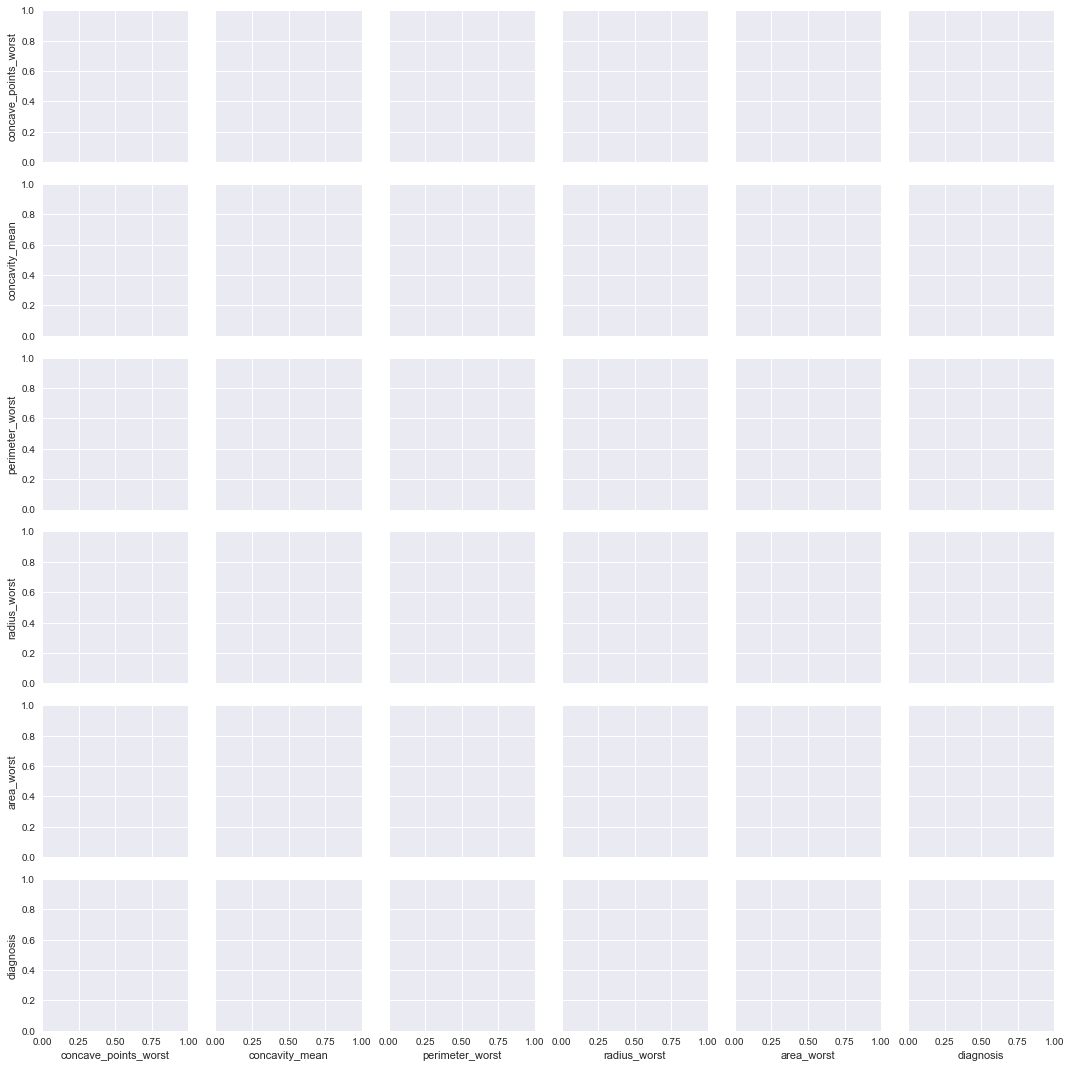

In [7]:
cols = ['concave_points_worst', 'concavity_mean', 
        'perimeter_worst', 'radius_worst', 
        'area_worst', 'diagnosis']

sns.pairplot(can,
             x_vars = cols,
             y_vars = cols,
             hue = 'diagnosis', 
             palette = ('Red', '#875FDB'), 
             markers=["o", "D"])

# Pre-Processing the data

In [1]:
array = can.values
X = array[:,1:31]
y = array[:,0]


NameError: name 'can' is not defined

In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [196]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [197]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data 
scaler =StandardScaler()
Xs = scaler.fit_transform(X)


In [198]:
from sklearn.preprocessing import scale
xi = can.values #convert the data into a numpy array
xi = scale(can);
xi

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 1.29767572,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Dimensionality  reduction 

In [199]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 30) 

In [200]:
covar_matrix.fit(xi)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([  44.9,   63.4,   72.6,   79. ,   84.4,   88.3,   90.5,   92.1,
         93.4,   94.5,   95.5,   96.4,   97.2,   97.9,   98.4,   98.7,
         99. ,   99.2,   99.4,   99.6,   99.7,   99.8,   99.9,  100. ,
        100.1,  100.1,  100.1,  100.1,  100.1,  100.1])

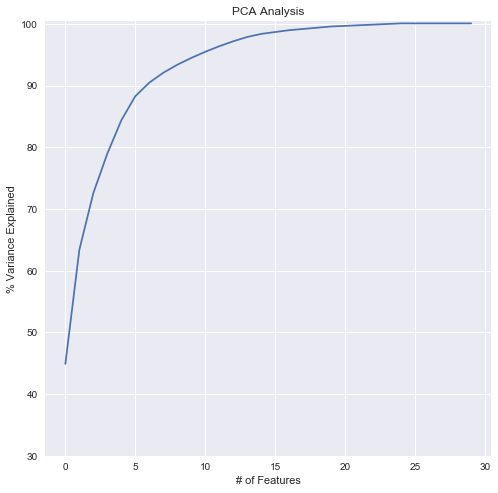

In [201]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

# Modelling the data

In [202]:
#prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','texture_worst','perimeter_worst','smoothness_worst','compactness_worst','symmetry_worst','texture_se','perimeter_se','smoothness_se','compactness_se','symmetry_se']

prediction_var = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 ]


In [203]:
train, test = train_test_split(can, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [204]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var] 
test_y =test.diagnosis   

# Random forest classifier for Dimensionality reduction

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
y = can['diagnosis']
X = can.drop(['diagnosis'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.979020979021


In [206]:
from sklearn import metrics
prediction=forest.predict(X_test)
metrics.accuracy_score(prediction,y_test)

0.97902097902097907

In [207]:
can.shape[1]

31

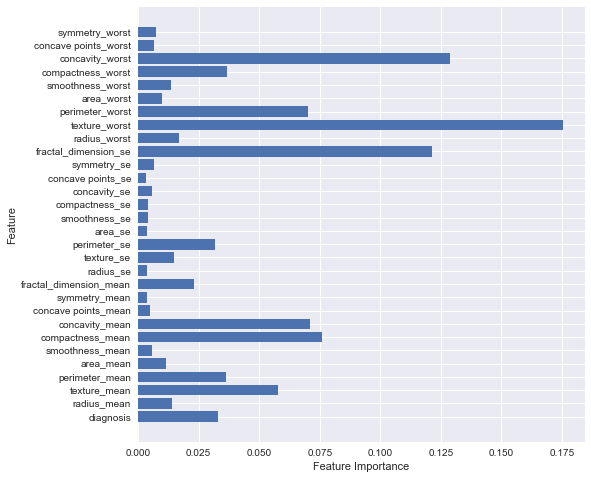

In [208]:
n_features = X.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features),can)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [209]:
can2 = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'] 
         

can3 = ['concave_points_mean','area_worst','perimeter_mean','perimeter_worst','radius_worst','radius_mean','concavity_mean','radius_se','area_se','radius_worst','concavity_worst','concave_points_worst']
can3

['concave_points_mean',
 'area_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_worst',
 'radius_mean',
 'concavity_mean',
 'radius_se',
 'area_se',
 'radius_worst',
 'concavity_worst',
 'concave_points_worst']

In [210]:
can1 = can2[2:]
#can1

#Validation 

In [211]:
#l_svm_cm = metrics.confusion_matrix(y_test, prediction)
#l_svm_cm

array([[98,  0],
       [ 3, 42]])

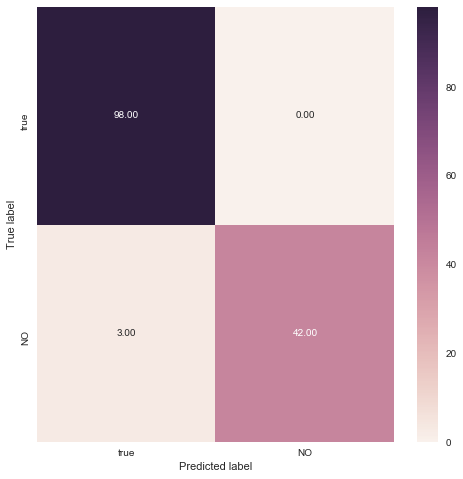

In [212]:
#sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
#plt.ylabel('True label')
#plt.xlabel('Predicted label')

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        98
          1       1.00      0.93      0.97        45

avg / total       0.98      0.98      0.98       143



# SVM

In [214]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
y = can['diagnosis']
X = can.drop(['diagnosis'],axis=1)
#X=can3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
score=metrics.accuracy_score(prediction,test_y)
score

0.61988304093567248

In [215]:
l_svm_cm = metrics.confusion_matrix( test_y, prediction)
l_svm_cm

array([[105,   2],
       [ 63,   1]])

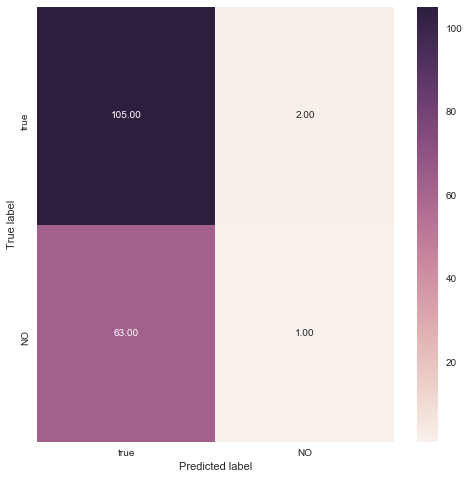

In [216]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [217]:
print(classification_report(test_y,prediction))

             precision    recall  f1-score   support

          0       0.62      0.98      0.76       107
          1       0.33      0.02      0.03        64

avg / total       0.52      0.62      0.49       171



In [218]:
prediction_var = features_worst

In [219]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.61988304093567248

In [220]:
l_svm_cm = metrics.confusion_matrix( test_y, prediction)
l_svm_cm

array([[105,   2],
       [ 63,   1]])

In [221]:
prediction_var = features_se
prediction_var


['radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se']

In [222]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var] 
test_y =test.diagnosis   

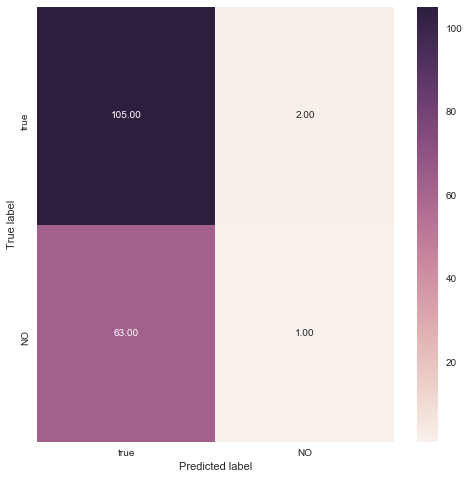

In [223]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [224]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.85964912280701755

In [225]:
prediction_var = features_mean

In [226]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [227]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.64327485380116955

In [228]:
l_svm_cm = metrics.confusion_matrix( test_y, prediction)
l_svm_cm

array([[102,   5],
       [ 56,   8]])

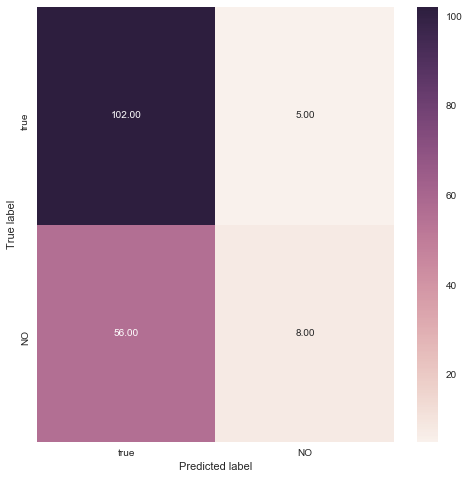

In [229]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# KNN classifier

In [230]:
#import mglearn
#mglearn.plots.plot_knn_classification(n_neighbors=3)

In [231]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [232]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.948356807512
0.944055944056


# Logistic regression

In [233]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.964788732394
0.944055944056


# Decision tree

In [235]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
    

0.953045404208


In [236]:
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit(X_train, y_train)
    print( "Tree Depth: ",
          depth,
          " - Accuracy: ",
          metrics.accuracy_score(y_test, clf_tree.predict(X_test) ))

Tree Depth:  2  - Accuracy:  0.93006993007
Tree Depth:  3  - Accuracy:  0.916083916084
Tree Depth:  4  - Accuracy:  0.937062937063
Tree Depth:  5  - Accuracy:  0.951048951049
Tree Depth:  6  - Accuracy:  0.888111888112


In [237]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))


0.985915492958
0.937062937063


In [238]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree.fit(X_train, y_train )
tree_predict = clf_tree.predict(X_train )
metrics.accuracy_score(y_train, tree_predict )

0.9859154929577465

In [239]:
tree_cm = metrics.confusion_matrix(y_train, tree_predict )
tree_cm

array([[257,   2],
       [  4, 163]])

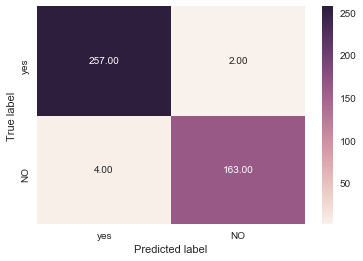

In [240]:
sn.heatmap(tree_cm, annot=True,  fmt='.2f', xticklabels = ["yes", "NO"] , yticklabels = ["yes", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [281]:
from sklearn import tree
sklearn.tree.export_graphviz( clf_tree, out_file = "yes_tree.odt",
                feature_names = X_train)

NameError: name 'sklearn' is not defined

In [251]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'yes_tree.odt' )




^
Expected "}" (at char 34), (line:3, col:1)


In [252]:
chd_tree_graph.write_jpg( 'yes_tree.jpg' )

AttributeError: 'NoneType' object has no attribute 'write_jpg'

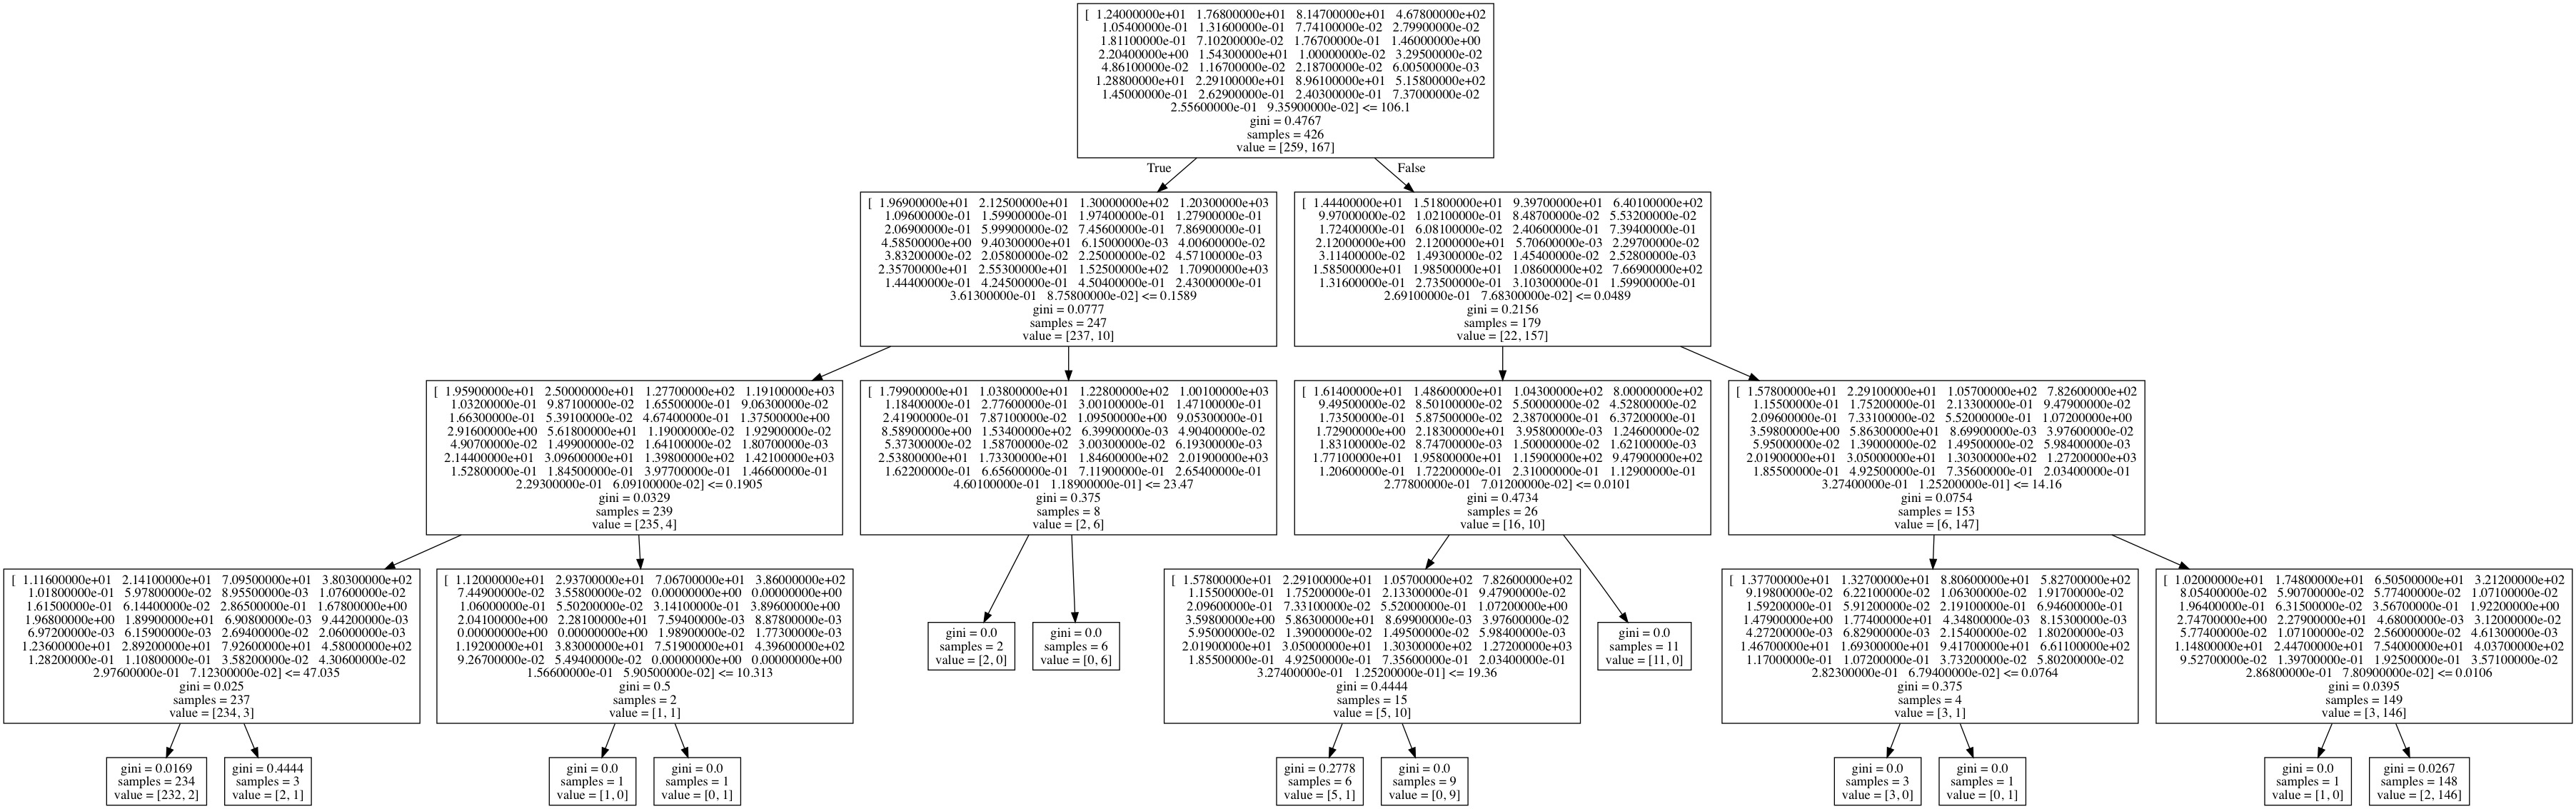

In [253]:
from IPython.display import Image
Image(filename='yes_tree.jpg')

In [2]:
gini_node_1 = 1 - pow(259/426, 2) - pow (167/426, 2)
print( gini_node_1 )

0.4766801119707289


In [255]:
gini_left_split = 1 - pow(237/247, 2) - pow (10/247, 2)
gini_left_split

0.07769345506400699

In [256]:
gini_right_split = 1 - pow(22/179, 2) - pow (157/179, 2)
gini_right_split

0.21559876408351797

In [257]:
info_gain = gini_node_1 - (22/179)*gini_left_split - (157/179)*gini_right_split
info_gain

0.27803060374435756

# Random forest

In [258]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.954354636591


In [259]:
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit(X_train, y_train)
    print( "Tree Depth: ",
          depth,
          " - Accuracy: ",
          metrics.accuracy_score(y_train, clf_tree.predict(X_train) ) )

Tree Depth:  2  - Accuracy:  0.948356807512
Tree Depth:  3  - Accuracy:  0.969483568075
Tree Depth:  4  - Accuracy:  0.985915492958
Tree Depth:  5  - Accuracy:  0.992957746479
Tree Depth:  6  - Accuracy:  0.995305164319


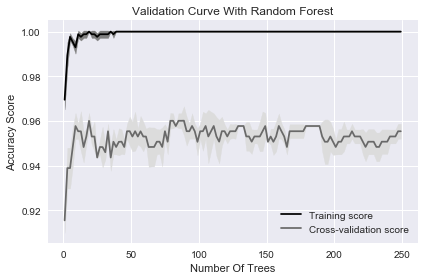

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train, 
                                             y_train,
                                             
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Boosting

In [282]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.957641196013


# Gradient Boosting

In [283]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.950609080842


# Stacking Algorithim

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.949028822055


# Neural Net

In [285]:
can.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [286]:
y = can['diagnosis']
X = can.drop(['diagnosis'],axis=1)

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [288]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [289]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [290]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))

In [291]:
mlp.fit(X_train,y_train)

/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [292]:
predictions = mlp.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0])

In [293]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[96  2]
 [ 2 43]]


In [294]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        98
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       143



In [295]:
len(mlp.coefs_)
len(mlp.intercepts_[0])

5

In [296]:
len(mlp.coefs_)

4

In [297]:
print(mlp.coefs_)

[array([[  5.48850420e-01,   1.22291303e-01,   1.76706156e-01,
          1.68011842e-04,   4.79956204e-02],
       [  3.71469111e-01,   4.63344214e-01,   1.38208244e-01,
          2.91204431e-01,  -5.86106586e-01],
       [  6.60422683e-02,   3.50680393e-01,  -1.51351576e-01,
          1.37439462e-01,  -5.10492859e-01],
       [ -1.84792852e-01,  -1.75150989e-01,   5.58613189e-01,
          5.31255460e-01,  -4.88446933e-01],
       [  3.96842619e-01,   1.85343205e-01,  -1.31149285e-01,
         -4.39703867e-02,   3.08414260e-02],
       [  3.62692992e-01,   1.66726078e-01,   2.32752054e-01,
          3.23561568e-01,   1.97265608e-01],
       [  2.15883852e-01,   9.61060758e-02,   3.84271249e-01,
         -6.16164304e-02,   5.87548923e-02],
       [ -4.80537342e-02,   2.22063351e-01,  -2.35720962e-02,
          9.04316000e-02,  -3.06704514e-01],
       [  2.93710504e-01,   2.05523796e-01,   3.16306254e-02,
         -1.14505585e-01,  -3.02117392e-01],
       [  4.01076170e-02,  -2.686344